In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Lets load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


6 numerical data and remaining categorical 

In [5]:
#lets check null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Theres no missing value

In [6]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [7]:
# Let's check the value count of all the columns
for i in df.columns:
        print(i,"\n",df[i].value_counts())
        print('-----------------------------------')

Age 
 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
-----------------------------------
Workclass 
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
-----------------------------------
Fnlwgt 
 164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
-----------------------------------
Education 
  HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               

In [8]:
# let's check duplicate values
df.duplicated().sum()

24

In [9]:
# let's drop duplicate data

df.drop_duplicates()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
df["Workclass"] = df.Workclass.str.replace("?", "Private")
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [11]:
# checking statistical point
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1.We have 6 columns of type int and all the others are of type object
2.Target variable is having two results >=50k or <=50k
3.The mean is almost equal to the median for Age, Fnlwgt, Education_num, Hours_per_week
4.The mean has a variation with the median for Capital_gain, Capital_loss
5.Dataset has no null values
6.It looks like capital gain, capital loss, FnlWgt has Skewness
7.We found " ? " in 3 columns and replaced it.
8.Datset had 24 Duplicate values, hence we dropped them.

In [12]:
# grouping categorical columns
cat = [x for x in df.columns if df[x].dtypes=='O']
# grouping numerical columns
num = [y for y in df.columns if df[y].dtypes!='O']

Univariate Analysis

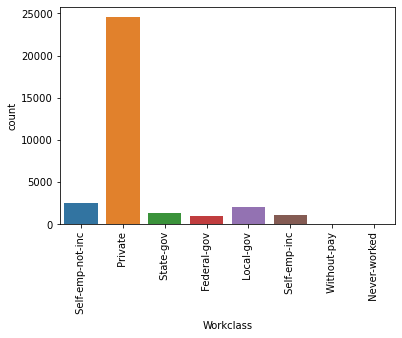

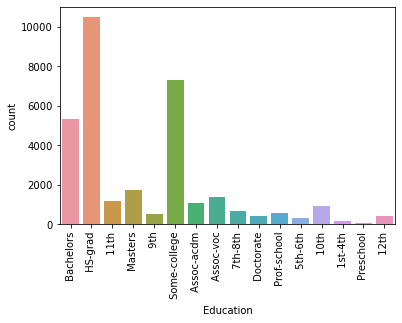

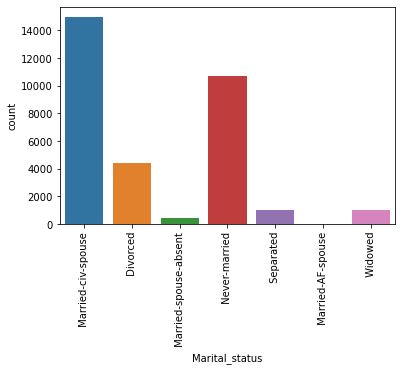

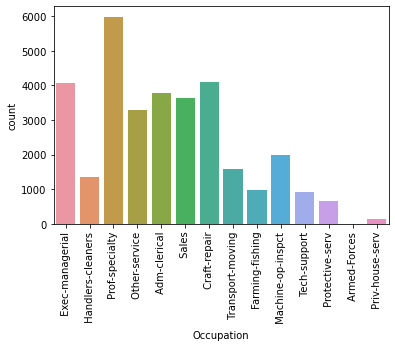

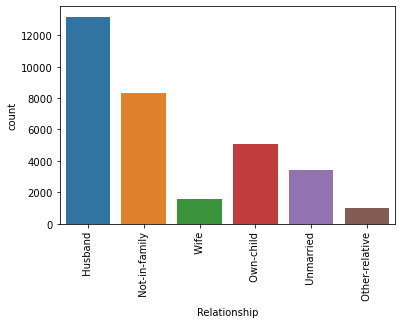

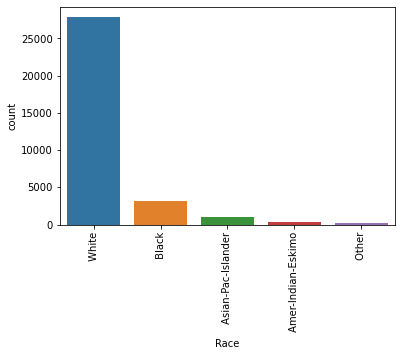

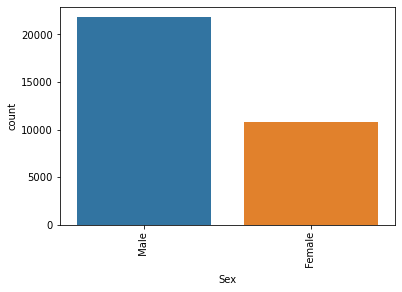

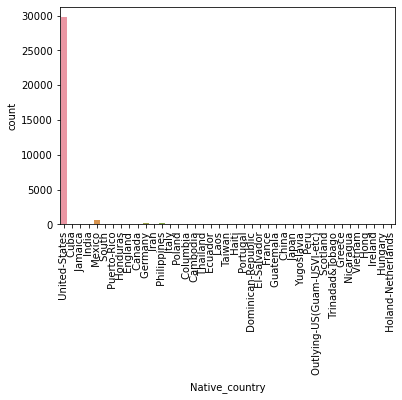

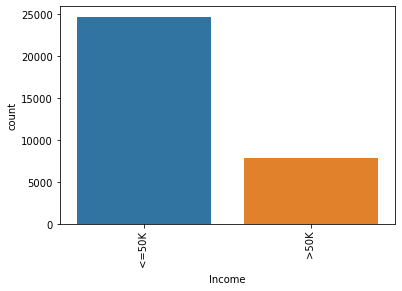

In [13]:
for i,col in enumerate(df[cat]):
    plt.figure(i)
    figsize=(15,10)
    chart=sns.countplot(x=col ,data=df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


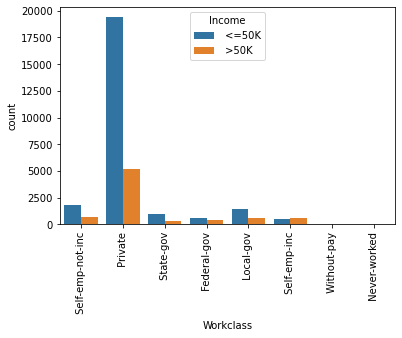

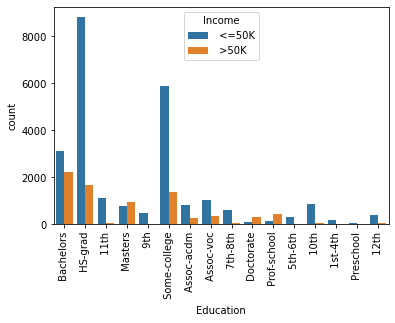

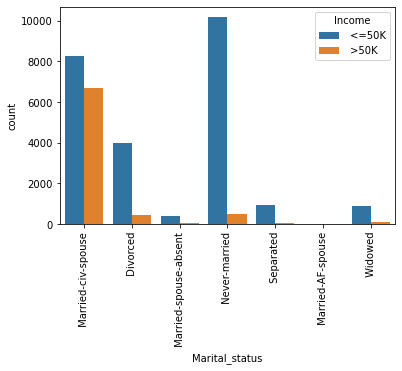

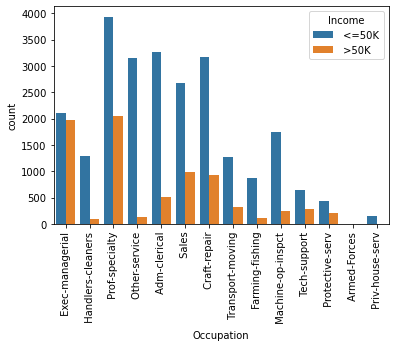

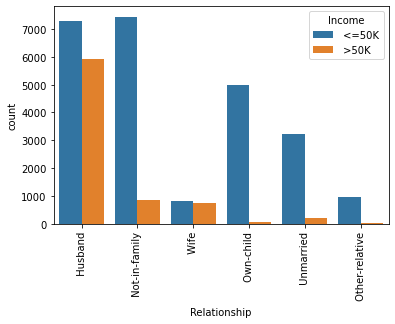

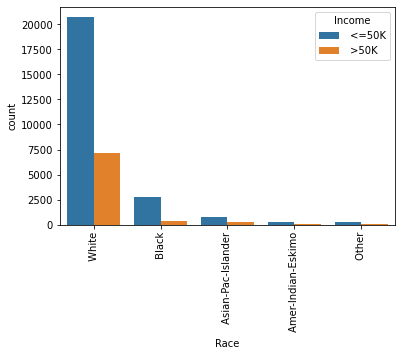

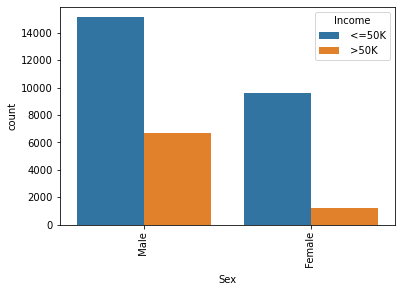

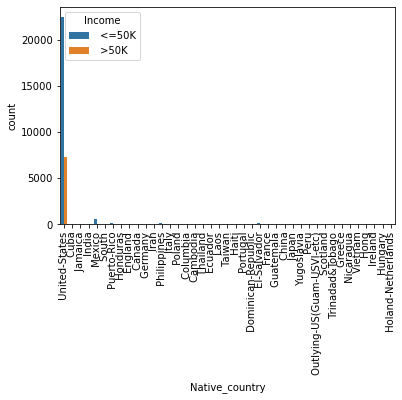

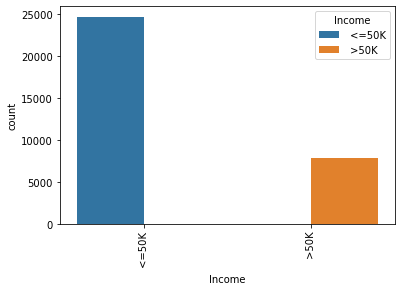

In [14]:
for i,col in enumerate(df[cat]):
    plt.figure(i)
    figsize=(15,10)
    chart=sns.countplot(x=col ,hue='Income',data=df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

1.The majority of the population works in the private sector and the majority has an income <= 50k
2.most of the population earning <=50k is high school graduate
3.Most people earning> = 50k have Bachelors in some fields
4.Most people who are married earn> = 50k and who earn <= 50k are never married
5.Most of the population earning> = 50,000 are Exec-managerial or professors
6.Majority of the Males are earning more compared to females
7.Since most US people are of the Race white, their incomes are higher
8..According to the graph, the majority of the population around 90% are from the United States
9.Most people earn <=50k.

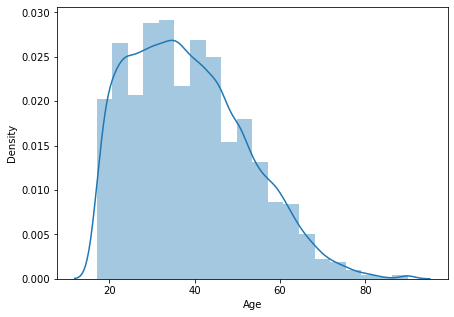

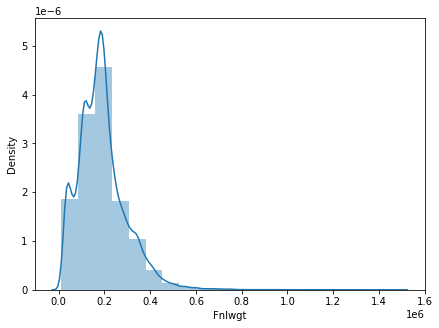

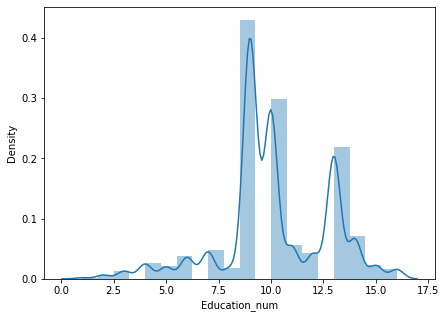

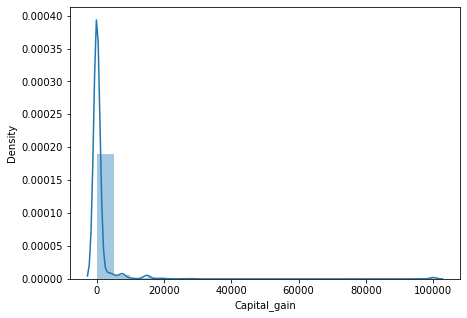

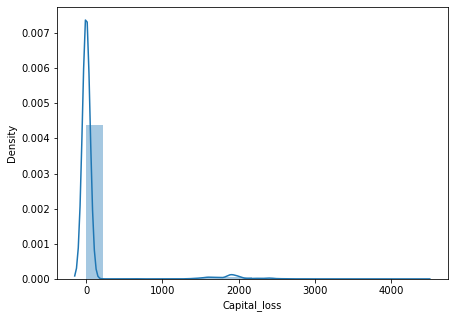

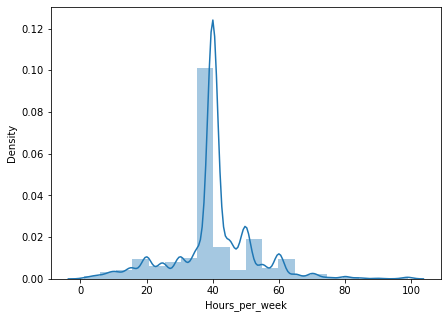

In [15]:
# plotting distplot to check the distributions of each numerical category feature
for i in num:
    plt.figure(figsize=(7,5))
    sns.distplot(df[i],hist=True,bins = 20,kde=True)
    plt.show()

1.The above plot shows Capital Loss,Capital gain,Fnlwgt are right skewed
2.Age,Education_num,Hours_per_week are normally distributed
3.Most of the population works for about 40 hours per week

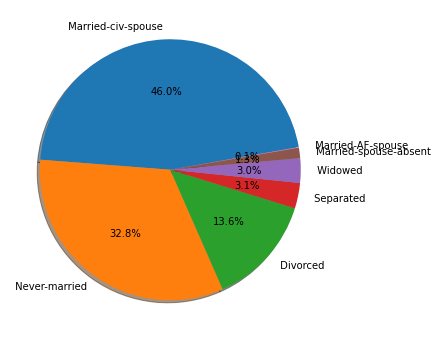

In [16]:
marital = df['Marital_status'].value_counts()
plt.figure(figsize=(15,6))
plt.pie(marital.values, labels = marital.index, startangle=10, shadow = True, autopct='%1.1f%%')
plt.show()

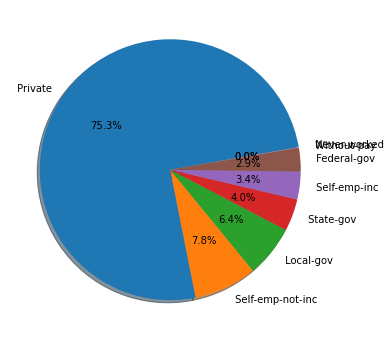

In [17]:
workclass = df['Workclass'].value_counts()
plt.figure(figsize=(15,6))
plt.pie(workclass.values, labels =workclass.index, startangle=10, shadow = True, autopct='%1.1f%%')
plt.show()

46% of population is married-civ-spouse and 75% works in private

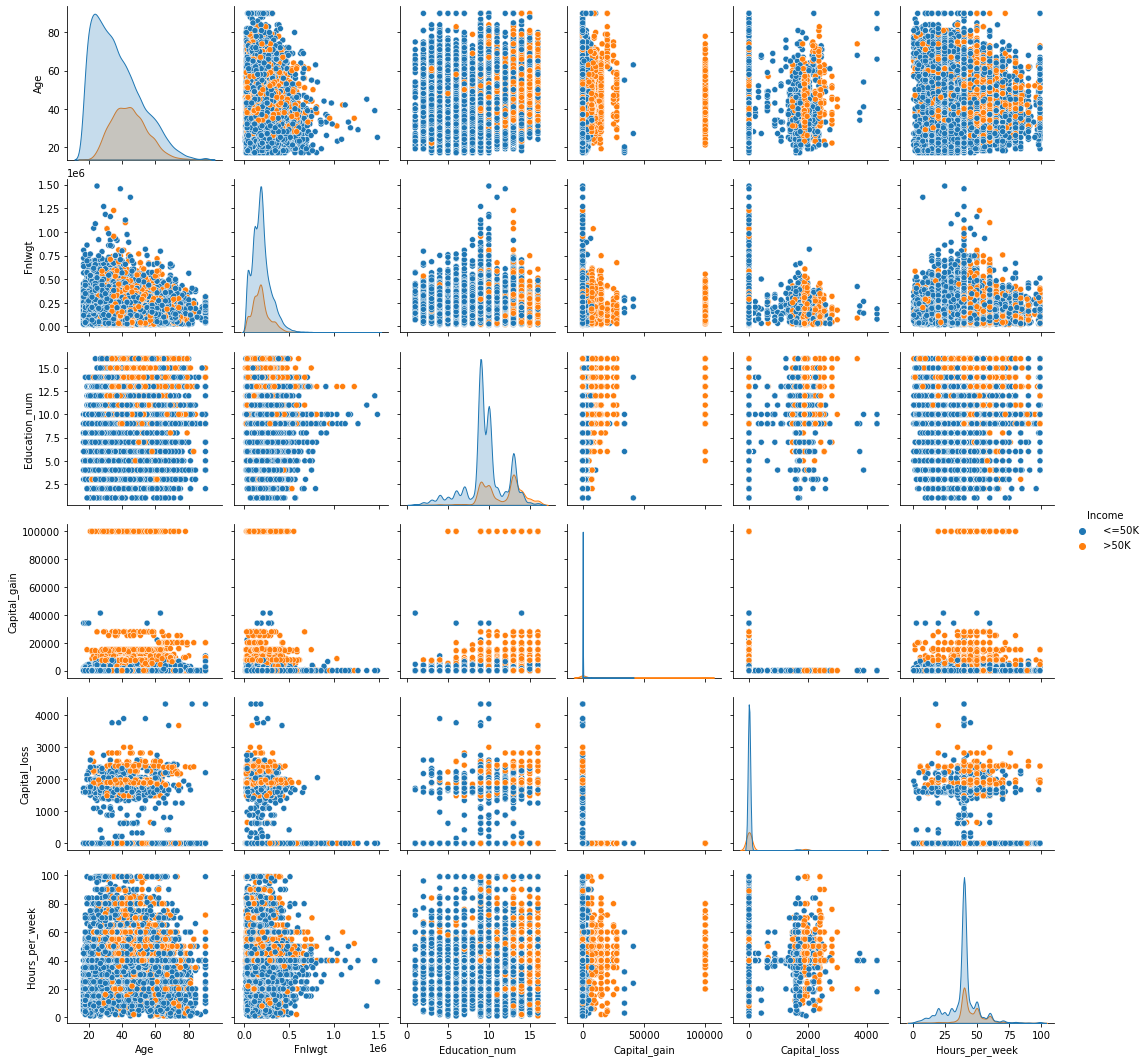

In [18]:
# plotting pairplot to check the relationship with multiple bivariate features
sns.pairplot(df,hue='Income')
plt.show()

In [19]:
#Lets check the entries in Capital_gain column
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [20]:
#we will replace 0 in Capital_gain column with mean of this column
df["Capital_gain"].replace(0, df["Capital_gain"].mean(),inplace = True)

In [21]:
#Lets check the entries in Capital_loss column
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i])

In [23]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,1077.615172,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,1077.615172,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,1077.615172,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,1077.615172,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,1077.615172,0,40,38,0


In [24]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

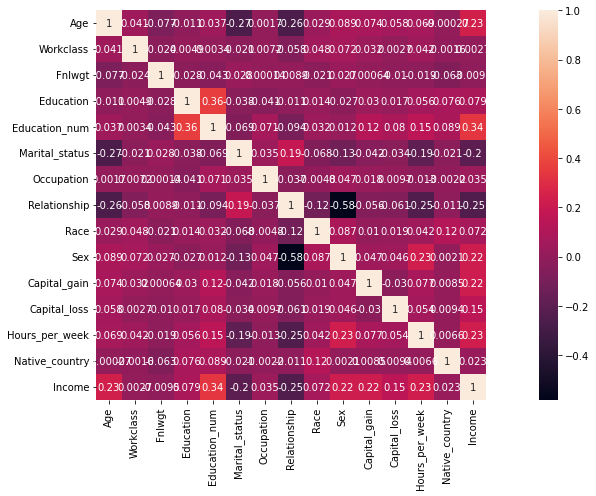

In [25]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (15,7))
sns.heatmap(df_corr, annot=True, square=True)
plt.tight_layout()

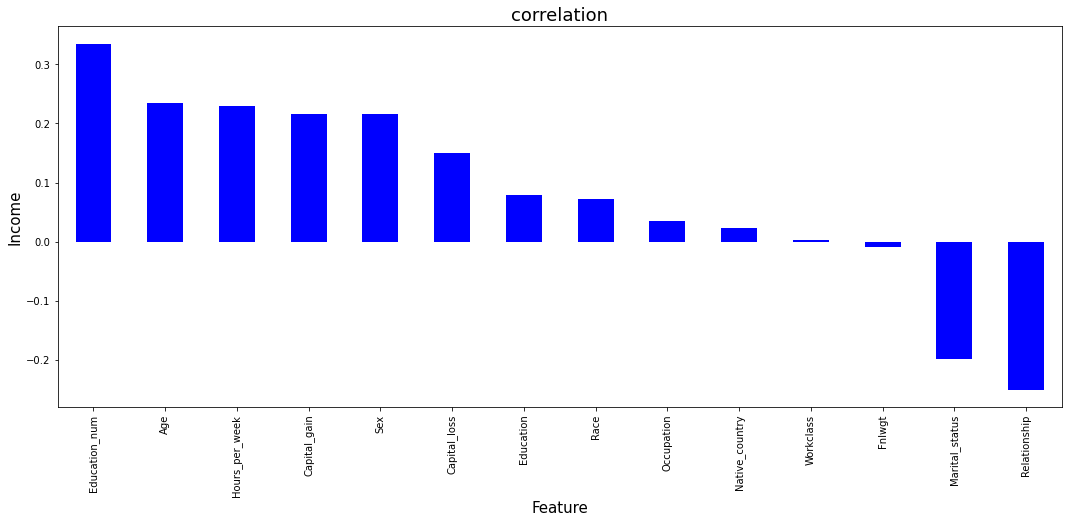

In [26]:
plt.figure(figsize=(18,7))
df.corr()['Income'].sort_values(ascending = False).drop(['Income']).plot(kind = 'bar', color = 'b')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Income', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

In [27]:
corr=df.corr()
abs(corr['Income'].sort_values(ascending=False))

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.216691
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Race              0.071853
Occupation        0.034599
Native_country    0.023063
Workclass         0.002739
Fnlwgt            0.009481
Marital_status    0.199295
Relationship      0.250924
Name: Income, dtype: float64

In [28]:
#First transform our data into label and features

x = df.drop(columns = "Income")
y = df["Income"]

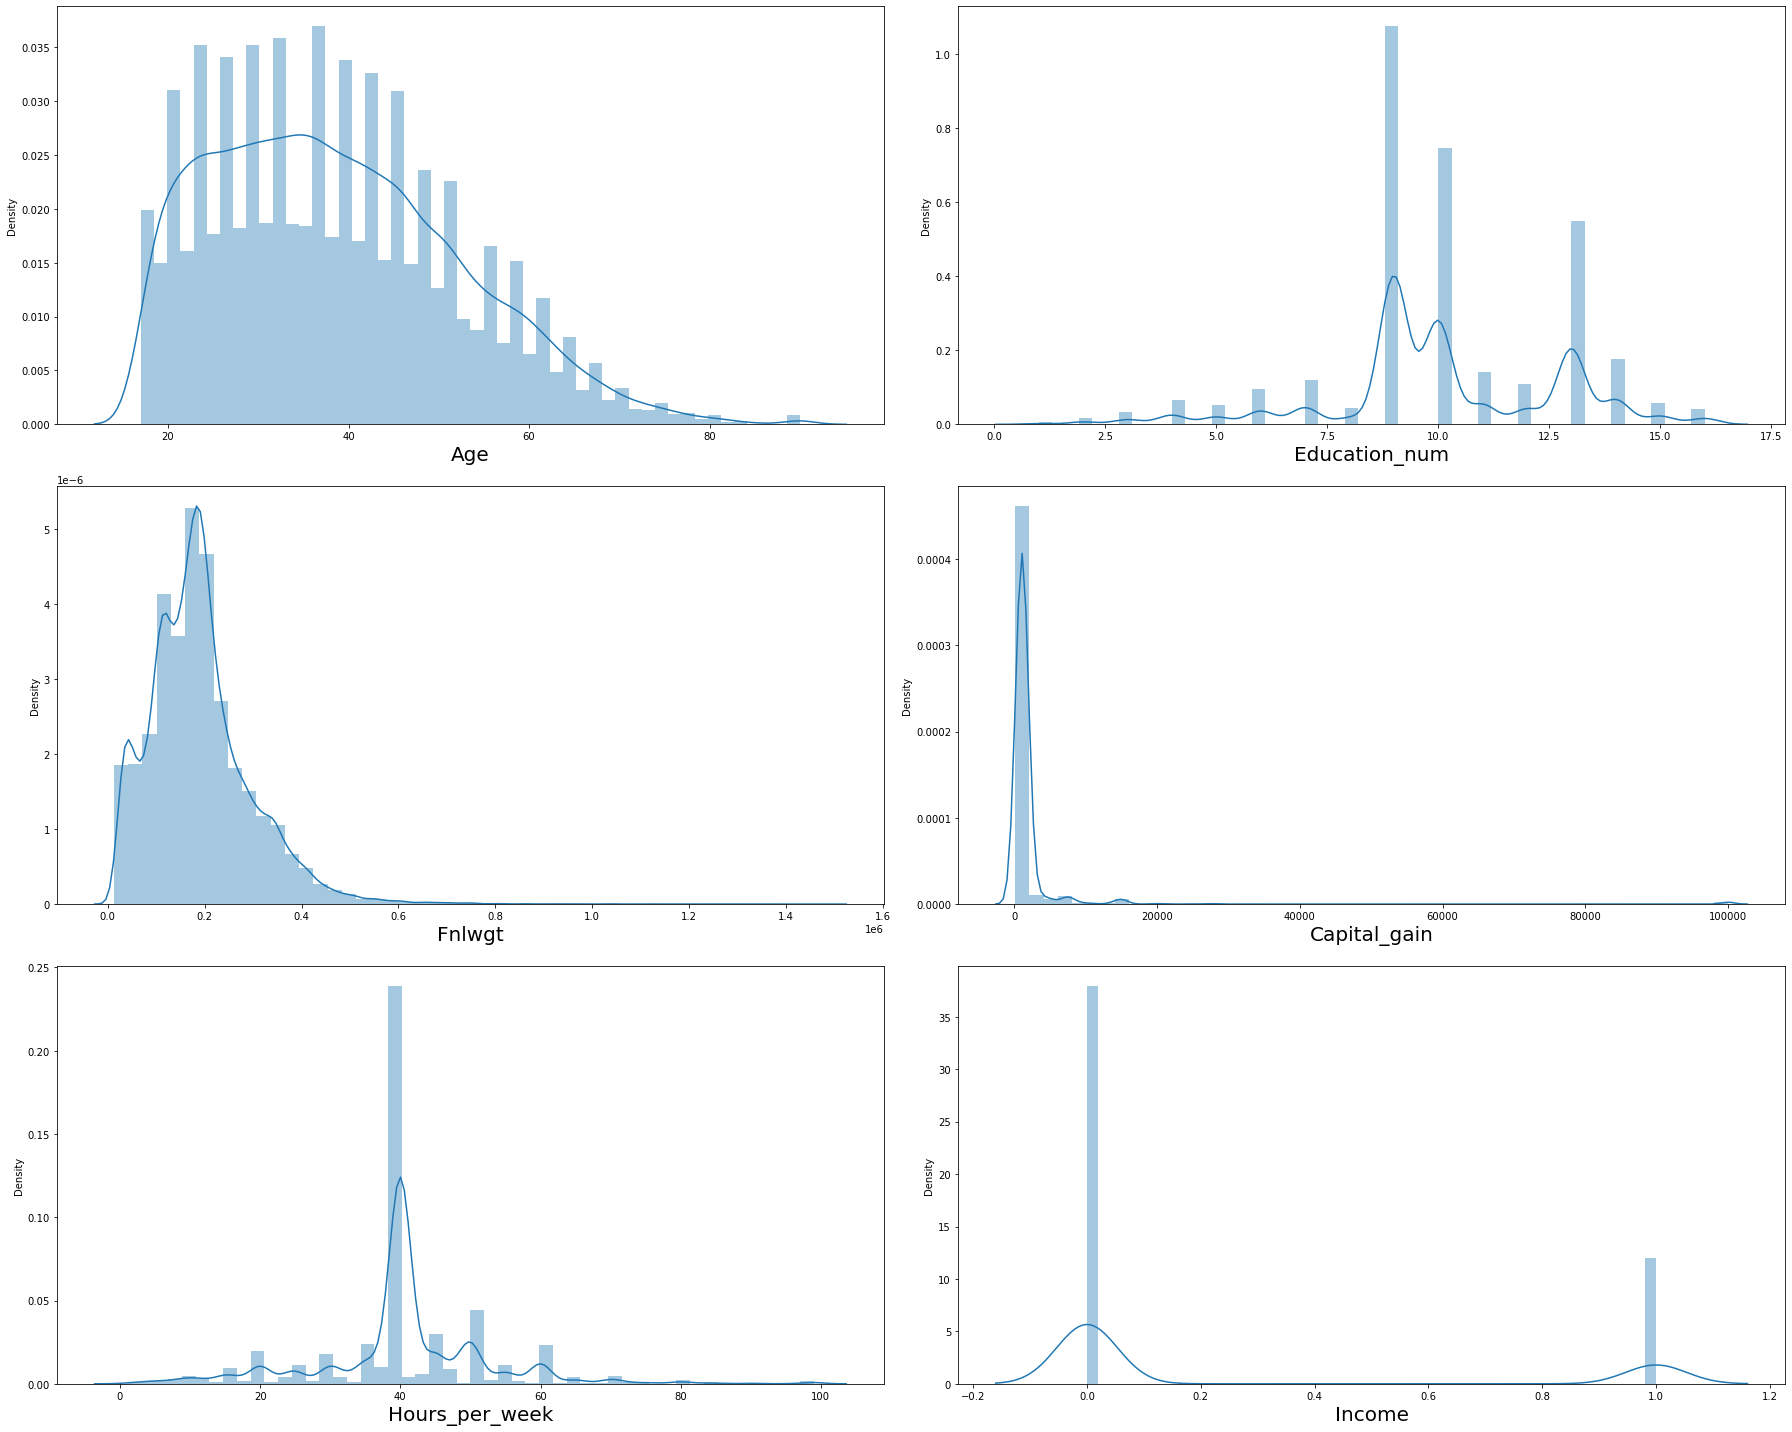

In [29]:
# check for outliers and Visualizing how data is distributed
plt.figure(figsize = (25,20))
plotnumber = 1
columns = ["Age","Education_num","Fnlwgt","Capital_gain","Hours_per_week","Income"]
for column in df[columns]:
    if plotnumber <=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [30]:
#remove outliers by applying zscore method
from scipy import stats
from scipy.stats import zscore
z = np.abs(zscore(df[['Age','Education_num','Fnlwgt','Capital_gain','Hours_per_week']]))
z
threshold = 3
np.where(z>3)

(array([    9,    27,    36, ..., 32524, 32524, 32530], dtype=int64),
 array([4, 4, 2, ..., 0, 4, 4], dtype=int64))

In [31]:
df1=df[(z<3).all(axis=1)]
df1.shape

(31255, 15)

In [32]:
print("Old df: ", df.shape[0])
print("New df",df1.shape[0])

Old df:  32560
New df 31255


In [33]:
y=y[(z<3).all(axis=1)]
y.shape

(31255,)

In [34]:
print("Data Loss Percentage: ", ((df.shape[0]-df1.shape[0])/df.shape[0]*100))

Data Loss Percentage:  4.007985257985258


In [35]:
df1.skew()


Age               0.476846
Workclass         0.079181
Fnlwgt            0.633372
Education        -0.946795
Education_num    -0.165837
Marital_status   -0.028848
Occupation        0.005576
Relationship      0.773345
Race             -2.452130
Sex              -0.703834
Capital_gain      5.449847
Capital_loss      4.536366
Hours_per_week   -0.348974
Native_country   -4.357428
Income            1.237092
dtype: float64

In [36]:
#First divide our data into label and features

x = df.drop(columns = "Income")
y = df["Income"]

In [37]:
x.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      12.248734
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
dtype: float64

In [38]:
#Removing skewness
#Apply yeo-johnson Power transformation to remove skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

x['Age'] = scaler.fit_transform(x['Age'].values.reshape(-1,1))
x['Fnlwgt'] = scaler.fit_transform(x['Fnlwgt'].values.reshape(-1,1))
x['Education_num'] = scaler.fit_transform(x['Education_num'].values.reshape(-1,1))
x['Capital_gain'] = scaler.fit_transform(x['Capital_gain'].values.reshape(-1,1))
x['Hours_per_week'] = scaler.fit_transform(x['Hours_per_week'].values.reshape(-1,1))
x['Capital_loss'] = scaler.fit_transform(x['Capital_loss'].values.reshape(-1,1))


In [39]:
x.skew()

Age              -0.013897
Workclass         0.076178
Fnlwgt            0.016914
Education        -0.934063
Education_num     0.023885
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      0.000000
Capital_loss      4.299511
Hours_per_week    0.229556
Native_country   -4.243083
dtype: float64

In [40]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,Y = SM.fit_resample(x,y)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier

In [42]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [43]:
# Lets find the best random state using LogisticRegression
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.7647249190938511 on Random State 58


In [44]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.25, random_state = max_rs )

In [45]:
#Lets check the model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,predlr)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

Accuracy Score: 76.47249190938511%
roc_auc_score: 76.46001204081814%
---------------------------------------------------
Confusion Matrix : 
 [[4590 1542]
 [1366 4862]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      6132
           1       0.76      0.78      0.77      6228

    accuracy                           0.76     12360
   macro avg       0.76      0.76      0.76     12360
weighted avg       0.76      0.76      0.76     12360



In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_dt)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100}%")
print("---------------------------------------------------")
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

Accuracy Score: 81.88511326860841%
roc_auc_score: 81.87968419875142%
---------------------------------------------------
Confusion Matrix : 
 [[4978 1154]
 [1085 5143]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      6132
           1       0.82      0.83      0.82      6228

    accuracy                           0.82     12360
   macro avg       0.82      0.82      0.82     12360
weighted avg       0.82      0.82      0.82     12360



In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_rf)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_rf)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

Accuracy Score: 87.50809061488674%
roc_auc_score: 87.48785549007262%
---------------------------------------------------
Confusion Matrix : 
 [[5205  927]
 [ 617 5611]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      6132
           1       0.86      0.90      0.88      6228

    accuracy                           0.88     12360
   macro avg       0.88      0.87      0.87     12360
weighted avg       0.88      0.88      0.87     12360



In [48]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_kn)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}%")
print("---------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

Accuracy Score: 83.8673139158576%
roc_auc_score: 83.81015852905948%
---------------------------------------------------
Confusion Matrix : 
 [[4688 1444]
 [ 550 5678]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      6132
           1       0.80      0.91      0.85      6228

    accuracy                           0.84     12360
   macro avg       0.85      0.84      0.84     12360
weighted avg       0.85      0.84      0.84     12360



In [49]:
#Let's check cross validation score for all algorithms:
from sklearn.model_selection import KFold, cross_val_score
k_f =KFold(n_splits = 3, shuffle = True)
model=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model:
    scores = cross_val_score(i, X,Y, cv = 5,scoring = "accuracy" )
    print("Cross validation score of", i ,"is:", scores.mean())

Cross validation score of LogisticRegression() is: 0.7559974945852534
Cross validation score of DecisionTreeClassifier() is: 0.8209691070586299
Cross validation score of RandomForestClassifier() is: 0.8781311772053328
Cross validation score of KNeighborsClassifier() is: 0.8436025837923224


In [50]:
print("Diff btwn accuracy score n cross vali score: ",accuracy_score(y_test,predlr)-scores.mean())
print("Diff btwn accuracy score n cross vali score: ",accuracy_score(y_test,pred_dt)-scores.mean())
print("Diff btwn accuracy score n cross vali score: ",accuracy_score(y_test,pred_rf)-scores.mean())
print("Diff btwn accuracy score n cross vali score: ",accuracy_score(y_test,pred_kn)-scores.mean())


Diff btwn accuracy score n cross vali score:  -0.07887766469847135
Diff btwn accuracy score n cross vali score:  -0.02475145110623833
Diff btwn accuracy score n cross vali score:  0.03147832235654491
Diff btwn accuracy score n cross vali score:  -0.004929444633746449


Our best model is random forest

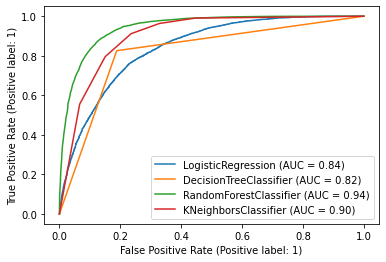

In [51]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)

plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

KNN and Random Forest are performing good so we will consifer random forest

In [52]:
#lets selects different parameters for tuning
grid_params = {
                'criterion':['gini','entropy'],
                'max_depth': [15,20,22],
                'n_estimators':[700,900,1000],
                'min_samples_leaf': [1]
                }

In [ ]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

In [ ]:
# printing the best parameters
GCV.best_params_  

In [ ]:
#Let's train and test our model using best parameters
model = RandomForestClassifier( criterion = 'gini', max_depth=20, n_estimators=1100, min_samples_leaf = 1)

model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred_rf)*100}%")
print("---------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("---------------------------")

print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
print("----------------------------")

In [ ]:
#Lets check our model performance after hyperparameter tuning by plottin 
plot_roc_curve(model, x_test, y_test)
plt.show()

In [ ]:
import joblib
joblib.dump(model,"Census_Income.pkl")

In [ ]:
Model = joblib.load("Census_Income.pkl")
a = np.array(y_test)
prediction = Model.predict(x_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final